In [2]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
import json
directorio='G:\\Redes\\'
#directorio='C:\\Users\\Usuario\\Documents\\GitHub\\Red\\'

In [3]:
version=1
paper_conjuntos = []

#Saca el campo del diccionario
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def agregarpaper(R_n,paper_conjuntos):
    paper_conjuntos = []
    
    with open(directorio+'papers_filtrados'+str(version)+'.txt', 'a',encoding='utf_8') as archivo_guardar:
         
    #archivo_guardar = open('C:\\Users\\Usuario\\Documents\\GitHub\\Red\\papers_filtro_'+str(version)+'.txt','a',encoding='utf-8') 
    
        R = open('G:\Redes\mag_papers_'+R_n+'.txt', 'r') 
        N = 999999
        i = 0
        for line in R:
            paper=ast.literal_eval(line)
            try:
                paper['doc_type']
                paper['fos']
                paper['keywords']
                paper['references']
                paper['venue']
                if paper['doc_type']=='Journal' and paper['lang']=='en':
                    paper_conjuntos.append(paper)
                    key='abstract';sacarcampo(paper,key)
                    key='url';sacarcampo(paper,key)
                    key='lang';sacarcampo(paper,key)
                    key='page_start';sacarcampo(paper,key)
                    key='page_end';sacarcampo(paper,key)
                    key='doc_type';sacarcampo(paper,key)
                    key='pdf';sacarcampo(paper,key)
                    json.dump(paper, archivo_guardar, ensure_ascii=True)
                    archivo_guardar.write('\n')
            except KeyError:
                pass
            i+=1
            if i==N:
                break
        R.close()
    archivo_guardar.close()
    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    paper_conjuntos=agregarpaper(R_n,paper_conjuntos)
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
ides_out=[]
ides_in={}
for i in range(160,166):
    ides_in,ides_out=agregar_contar(ides_in,ides_out,str(i),[])
    print(i)

160
161
162
163
164
165


In [7]:
interseccion=(set(ides_out).intersection(list(ides_in.keys())))
print(len(interseccion))

181039


In [5]:
interseccion_archivo = open(directorio+'papers_filtro_'+str(version)+'.txt','a',encoding='utf-8') 
for i in interseccion:
    interseccion_archivo.write(i)
interseccion_archivo.close()

In [6]:
i=0
paper_conjuntos = []
R = open(directorio+'papers_filtrados'+str(version)+'.txt', 'r',encoding='utf_8') 
archivo_red = open(directorio+'archivo_red_'+str(version)+'.txt','a',encoding='utf-8')
archivo_year = open(directorio+'archivo_year_'+str(version)+'.txt','a',encoding='utf-8')
archivo_venue = open(directorio+'archivo_venue_'+str(version)+'.txt','a',encoding='utf-8')
archivo_fos = open(directorio+'archivo_fos_'+str(version)+'.txt','a',encoding='utf-8')
archivo_keywords = open(directorio+'archivo_keywords_'+str(version)+'.txt','a',encoding='utf-8')
archivo_name = open(directorio+'archivo_name_'+str(version)+'.txt','a',encoding='utf-8')
archivo_org = open(directorio+'archivo_org_'+str(version)+'.txt','a',encoding='utf-8')
for line in R:
    i+=1
    paper=ast.literal_eval(line)
    if paper['id'] in interseccion:
        archivo_year.write(str(paper['id'])+' '+str(paper['year']))
        archivo_year.write('\n')
        archivo_fos.write(str(paper['id'])+' '+str(paper['fos']))
        archivo_fos.write('\n')
        archivo_venue.write(str(paper['id'])+' '+str(paper['venue']))
        archivo_venue.write('\n')
        try:
            archivo_keywords.write(paper['id']+' '+str(paper['keywords']))
            archivo_keywords.write('\n')
        except KeyError:
            pass
        try:
            archivo_name.write(paper['id']+' '+paper['authors'][0]['name'])
            archivo_name.write('\n')
        except KeyError:
            pass
        try:
            archivo_org.write(paper['id']+' '+paper['authors'][0]['org'])
            archivo_org.write('\n')
        except KeyError:
            pass
        for cita in paper['references']:
            if cita in interseccion:
                archivo_red.write(str(paper['id'])+' '+cita)
                archivo_red.write('\n')
R.close()
archivo_red.close()
archivo_year.close()
archivo_venue.close()
archivo_fos.close()
archivo_keywords.close()
archivo_name.close()
archivo_org.close()

In [29]:
line.split()[0]

'1f53757b-41ba-4efb-8e10-49f18064324c'

In [9]:
R.close()
archivo_red.close()
archivo_year.close()
archivo_venue.close()
archivo_fos.close()
archivo_keywords.close()
archivo_name.close()
archivo_org.close()
i

NameError: name 'R' is not defined

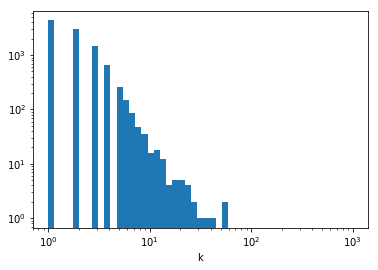

In [60]:
# Distribución de grado
grados_G = [gra for gra in Componentes[0].degree().values()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()